In [ ]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 56.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 38.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [ ]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt


Cloning into 'yolov5'...
remote: Enumerating objects: 17413, done.
remote: Counting objects: 100% (86/86), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 17413 (delta 64), reused 22 (delta 22), pack-reused 17327 (from 4)
Receiving objects: 100% (17413/17413), 16.31 MiB | 28.45 MiB/s, done.
Resolving deltas: 100% (11932/11932), done.
/content/yolov5


In [ ]:
!pip install gTTS


YOLOv5 🚀 v7.0-416-gfe1d4d99 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7031701 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


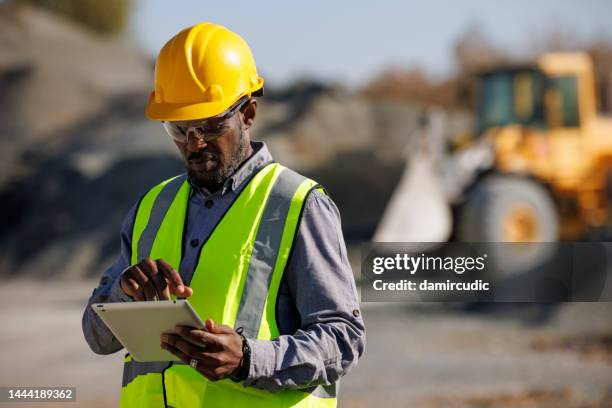

image 1/1: 408x612 1 helmet
Speed: 5.2ms pre-process, 9.3ms inference, 1.9ms NMS per image at shape (1, 3, 448, 640)


Detected objects: ['helmet']
Safety equipment detected. No alert necessary.


In [ ]:
import torch
from gtts import gTTS
from IPython.display import Audio, display
from PIL import Image
import os

# Load the YOLOv5 model
model = torch.hub.load('/content/yolov5', 'custom', path='/content/best.pt', source='local')

# Path to the image
img_path = '/content/test_image.jpg'

# Run detection
results = model(img_path)

# Display the input image
display(Image.open(img_path))
results.print()

# Normalize detected class names
predictions = [name.lower() for name in results.pandas().xyxy[0]['name'].tolist()]
print("Detected objects:", predictions)

# Define list of safety equipment (all lowercase)
safety_items = ['helmet', 'vest', 'mask']  # Match these with your actual model labels

# Check if any PPE item is detected
ppe_detected = any(item in predictions for item in safety_items)

if not ppe_detected:
    alert_text = "Warning. No safety equipment detected."
    print(alert_text)

    # Convert to speech and play
    tts = gTTS(alert_text)
    tts.save("alert.mp3")
    display(Audio("alert.mp3", autoplay=True))
else:
    print("Safety equipment detected. No alert necessary.")


YOLOv5 🚀 v7.0-416-gfe1d4d99 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7031701 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


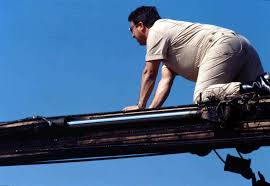

image 1/1: 186x270 (no detections)
Speed: 2.8ms pre-process, 7.7ms inference, 2.2ms NMS per image at shape (1, 3, 448, 640)


Detected objects: []
Warning. No safety equipment detected.


In [ ]:
import torch
from gtts import gTTS
from IPython.display import Audio, display
from PIL import Image
import os

# Load the YOLOv5 model
model = torch.hub.load('/content/yolov5', 'custom', path='/content/best.pt', source='local')

# Path to the image
img_path = '/content/image2.jpg'

# Run detection
results = model(img_path)

# Display the input image
display(Image.open(img_path))
results.print()

# Normalize detected class names
predictions = [name.lower() for name in results.pandas().xyxy[0]['name'].tolist()]
print("Detected objects:", predictions)

# Define list of safety equipment (all lowercase)
safety_items = ['helmet','vest', 'mask']  # Match these with your actual model labels

# Check if any PPE item is detected
ppe_detected = any(item in predictions for item in safety_items)

if not ppe_detected:
    alert_text = "Warning. No safety equipment detected."
    print(alert_text)

    # Convert to speech and play
    tts = gTTS(alert_text)
    tts.save("alert.mp3")
    display(Audio("alert.mp3", autoplay=True))
else:
    print("Safety equipment detected. No alert necessary.")


YOLOv5 🚀 v7.0-416-gfe1d4d99 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7031701 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


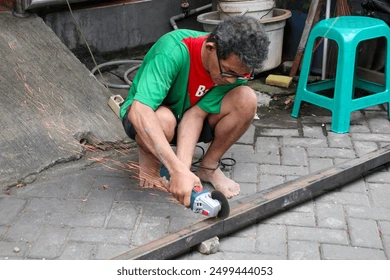

image 1/1: 280x390 (no detections)
Speed: 146.1ms pre-process, 14.0ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)


Detected objects: []
Warning. No safety equipment detected.


In [ ]:
import torch
from gtts import gTTS
from IPython.display import Audio, display
from PIL import Image
import os

# Load the YOLOv5 model
model = torch.hub.load('/content/yolov5', 'custom', path='/content/best.pt', source='local')

# Path to the image
img_path = '/content/images4.jpg'

# Run detection
results = model(img_path)

# Display the input image
display(Image.open(img_path))
results.print()

# Normalize detected class names
predictions = [name.lower() for name in results.pandas().xyxy[0]['name'].tolist()]
print("Detected objects:", predictions)

# Define list of safety equipment (all lowercase)
safety_items = ['helmet','vest', 'mask']  # Match these with your actual model labels

# Check if any PPE item is detected
ppe_detected = any(item in predictions for item in safety_items)

if not ppe_detected:
    alert_text = "Warning. No safety equipment detected."
    print(alert_text)

    # Convert to speech and play
    tts = gTTS(alert_text)
    tts.save("alert.mp3")
    display(Audio("alert.mp3", autoplay=True))
else:
    print("Safety equipment detected. No alert necessary.")


YOLOv5 🚀 v7.0-416-gfe1d4d99 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7031701 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


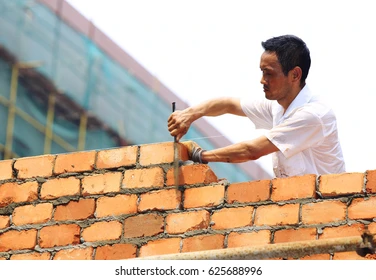

image 1/1: 280x376 (no detections)
Speed: 5.3ms pre-process, 7.2ms inference, 2.9ms NMS per image at shape (1, 3, 480, 640)


Detected objects: []
Warning. No safety equipment detected.


In [ ]:
import torch
from gtts import gTTS
from IPython.display import Audio, display
from PIL import Image
from realesrgan import RealESRGAN
import os

# Load the YOLOv5 model
model = torch.hub.load('/content/yolov5', 'custom', path='/content/best.pt', source='local')

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
esr_model = RealESRGAN(device, scale=4)
esr_model.load_weights('RealESRGAN_x4.pth')

# Load and enhance image using ESRGAN
img_path = '/content/images4.jpg'
input_image = Image.open(img_path).convert("RGB")
enhanced_image = esr_model.predict(input_image)

# Save enhanced image temporarily for detection
enhanced_img_path = '/content/enhanced_image.jpg'
enhanced_image.save(enhanced_img_path)

# Run detection on enhanced image
results = model(enhanced_img_path)

# Display the enhanced image
display(enhanced_image)
results.print()

# Normalize detected class names
predictions = [name.lower() for name in results.pandas().xyxy[0]['name'].tolist()]
print("Detected objects:", predictions)

# Define list of safety equipment (all lowercase)
safety_items = ['helmet','vest', 'mask','gloves','goggles']  # Match these with your actual model labels

# Check if any PPE item is detected
ppe_detected = any(item in predictions for item in safety_items)

if not ppe_detected:
    alert_text = "Warning. No safety equipment detected."
    print(alert_text)

    # Convert to speech and play
    tts = gTTS(alert_text)
    tts.save("alert.mp3")
    display(Audio("alert.mp3", autoplay=True))
else:
    print("Safety equipment detected. No alert necessary.")


In [ ]:
import torch
import cv2
import os
from gtts import gTTS
from IPython.display import Audio, display

# Load the YOLOv5 model
model = torch.hub.load('/content/yolov5', 'custom', path='/content/best.pt', source='local')
model.conf = 0.25  # Confidence threshold (adjustable)

# Define safety PPE item class names (must match your model output exactly)
safety_items = ['Helmet', 'Gloves', 'Vest', 'Mask', 'Goggles']  # Adjust as needed

# Load video
video_path = '/content/vedio1.mp4'
cap = cv2.VideoCapture(video_path)

frame_count = 0
alert_triggered = False

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    frame_count += 1

    # Process every nth frame to speed up
    if frame_count % 10 != 0:
        continue

    # Run inference
    results = model(frame)
    names = results.names
    detections = results.xyxy[0]  # tensor: [x1, y1, x2, y2, conf, class]
    detected_classes = [names[int(cls)] for cls in detections[:, -1]]

    print(f"Frame {frame_count} detected objects: {detected_classes}")

    # Check if any PPE item is detected
    if not any(ppe in detected_classes for ppe in safety_items):
        if not alert_triggered:
            alert_text = "Warning. No safety equipment detected."
            print(alert_text)
            tts = gTTS(alert_text)
            tts.save("alert.mp3")
            display(Audio("alert.mp3", autoplay=True))
            alert_triggered = True
    else:
        print("PPE detected.")
        alert_triggered = False  # Reset if PPE is seen again

cap.release()
cv2.destroyAllWindows()


YOLOv5 🚀 v7.0-416-gfe1d4d99 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7031701 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Frame 10 detected objects: []
Warning. No safety equipment detected.


/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Frame 20 detected objects: []


/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Frame 30 detected objects: []
Frame 40 detected objects: ['no_glove']
Frame 50 detected objects: []


/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Frame 60 detected objects: []


/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Frame 70 detected objects: ['no_glove']
Frame 80 detected objects: []
Frame 90 detected objects: []


/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Frame 100 detected objects: []


/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Frame 110 detected objects: []
Frame 120 detected objects: ['helmet']
Frame 130 detected objects: []
Frame 140 detected objects: []


/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Frame 150 detected objects: []
Frame 160 detected objects: ['helmet']


/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Frame 170 detected objects: []
Frame 180 detected objects: []
Frame 190 detected objects: ['helmet']
Frame 200 detected objects: ['no_glove']


/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Frame 210 detected objects: ['helmet', 'no_glove']
Frame 220 detected objects: ['helmet', 'no_glove']


/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Frame 230 detected objects: []
Frame 240 detected objects: ['helmet']
Frame 250 detected objects: []
Frame 260 detected objects: []


/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Frame 270 detected objects: []
Frame 280 detected objects: ['no_glove']


/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Frame 290 detected objects: []
Frame 300 detected objects: []
Frame 310 detected objects: ['helmet']
Frame 320 detected objects: []


/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Frame 330 detected objects: ['helmet']
Frame 340 detected objects: []


/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Frame 350 detected objects: []
Frame 360 detected objects: []
Frame 370 detected objects: []
Frame 380 detected objects: []


/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Frame 390 detected objects: []
Frame 400 detected objects: []
Frame 410 detected objects: []


/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Frame 420 detected objects: []
Frame 430 detected objects: []
Frame 440 detected objects: []
Frame 450 detected objects: []


/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Frame 460 detected objects: []
Frame 470 detected objects: []


/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Frame 480 detected objects: []
Frame 490 detected objects: []
Frame 500 detected objects: []
Frame 510 detected objects: []


/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Frame 520 detected objects: []
Frame 530 detected objects: []


/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Frame 540 detected objects: []
Frame 550 detected objects: []
Frame 560 detected objects: []
Frame 570 detected objects: []
Frame 580 detected objects: []


/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Frame 590 detected objects: []
Frame 600 detected objects: []


/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Frame 610 detected objects: []
Frame 620 detected objects: []
Frame 630 detected objects: []
Frame 640 detected objects: []


/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Frame 650 detected objects: ['mask']
Frame 660 detected objects: []
Frame 670 detected objects: []
Frame 680 detected objects: ['helmet']
Frame 690 detected objects: ['helmet']
Frame 700 detected objects: ['helmet']


/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Frame 710 detected objects: ['helmet']
Frame 720 detected objects: ['no_glove']


/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Frame 730 detected objects: ['helmet']
Frame 740 detected objects: ['helmet']
Frame 750 detected objects: ['helmet']
Frame 760 detected objects: []


/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Frame 770 detected objects: []


In [ ]:
import torch
import cv2
from gtts import gTTS
import threading
import os

# Load the YOLOv5 model
model = torch.hub.load('/content/yolov5', 'custom', path='/content/best.pt', source='local')
model.conf = 0.25  # confidence threshold

# Define PPE classes from your model
safety_items = ['Helmet', 'Gloves', 'Vest', 'Mask', 'Goggles']  # Adjust based on your labels

# Voice alert function (threaded to avoid blocking)
def play_alert():
    tts = gTTS("Warning. No safety equipment detected.")
    tts.save("alert.mp3")
    os.system("mpg123 alert.mp3")  # For Linux; use another method on Windows/Mac

# Open webcam
cap = cv2.VideoCapture(0)
alert_played = False

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Run YOLOv5 inference
    results = model(frame)
    names = results.names
    detections = results.xyxy[0]

    detected_classes = [names[int(cls)] for cls in detections[:, -1]]
    ppe_present = any(cls in safety_items for cls in detected_classes)

    # Draw boxes and labels
    for *xyxy, conf, cls in detections:
        label = names[int(cls)]
        color = (0, 255, 0) if label in safety_items else (0, 0, 255)  # Green if PPE, else Red
        cv2.rectangle(frame, (int(xyxy[0]), int(xyxy[1])), (int(xyxy[2]), int(xyxy[3])), color, 2)
        cv2.putText(frame, label, (int(xyxy[0]), int(xyxy[1]) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

    # Voice alert logic
    if not ppe_present:
        if not alert_played:
            threading.Thread(target=play_alert).start()
            alert_played = True
    else:
        alert_played = False

    # Show frame
    cv2.imshow("PPE Detection", frame)

    # Break loop on key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Cleanup
cap.release()
cv2.destroyAllWindows()


YOLOv5 🚀 v7.0-416-gfe1d4d99 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7031701 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
